<a href="https://colab.research.google.com/github/DEEPAK-RAMGIRI/AIML-LAB/blob/main/AIML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIML PROJECT HEALTH COST PREDICTION USING LINEAR REGRESSION

In [ ]:
import matplotlib.pyplot as mt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# loading the data from csv file to a Pandas DataFrame
IN = pd.read_csv('/content/insurance.csv')

In [ ]:
#Displays the first five rows of the dataframe by default
IN.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [ ]:
# getting some informations about the dataset
IN.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [ ]:
#Finding Number of columns
IN.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [ ]:
# statistical Measures of the dataset
IN.describe(percentiles=[.25,.5,.75,.9])

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
90%,59.000000,38.619500,3.000000,34831.719700
max,64.000000,53.130000,5.000000,63770.428010


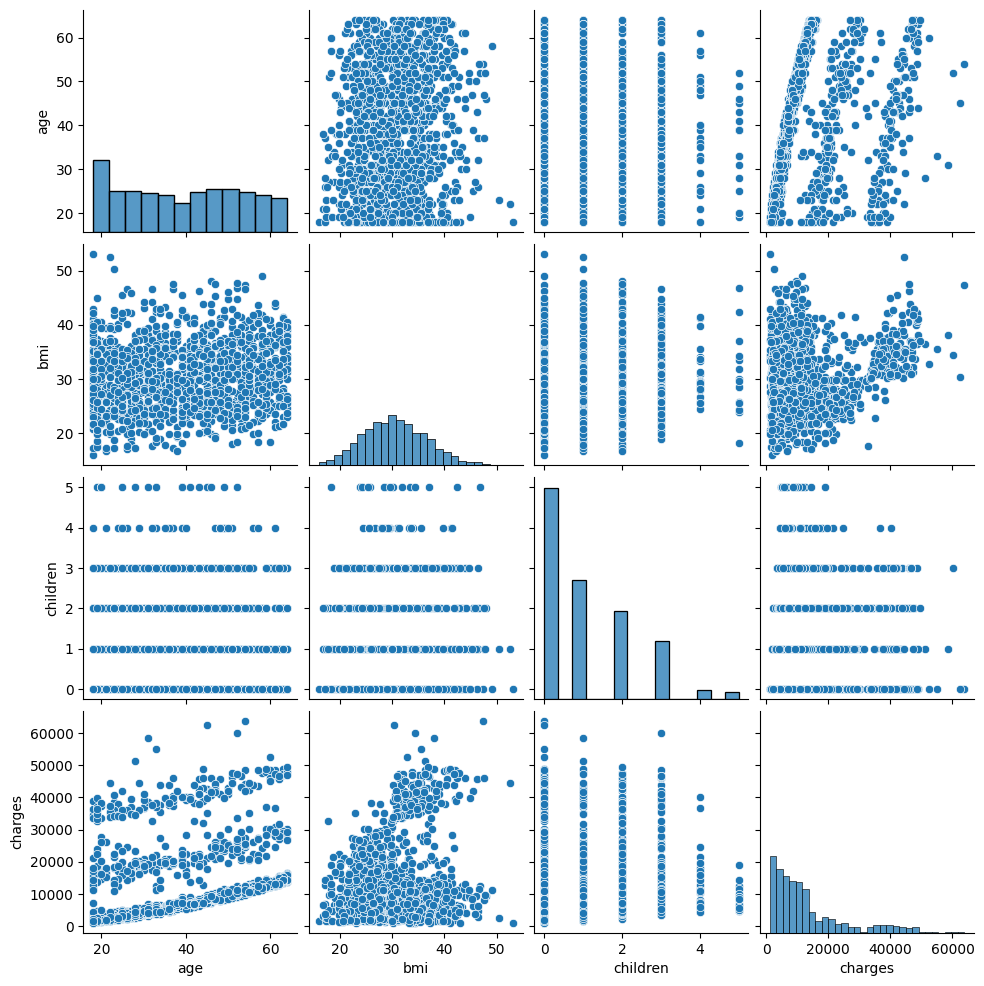

In [ ]:
#Pairplot diagram
sns.pairplot(IN)

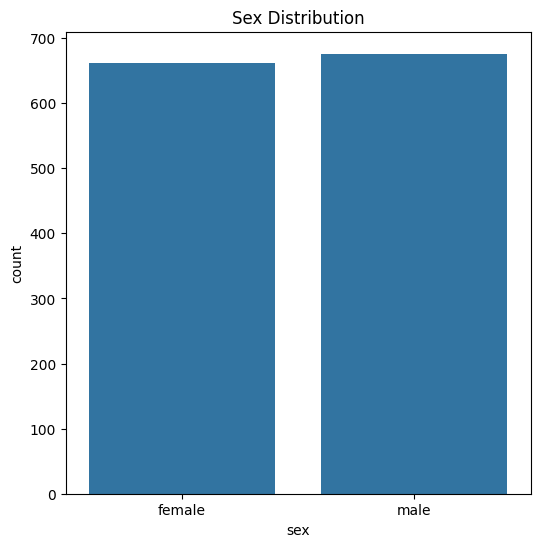

In [ ]:
# Gender column
mt.figure(figsize=(6,6))
sns.countplot(x='sex', data=IN)
mt.title('Sex Distribution')
mt.show()

In [ ]:
#Counting members according to gender
IN['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

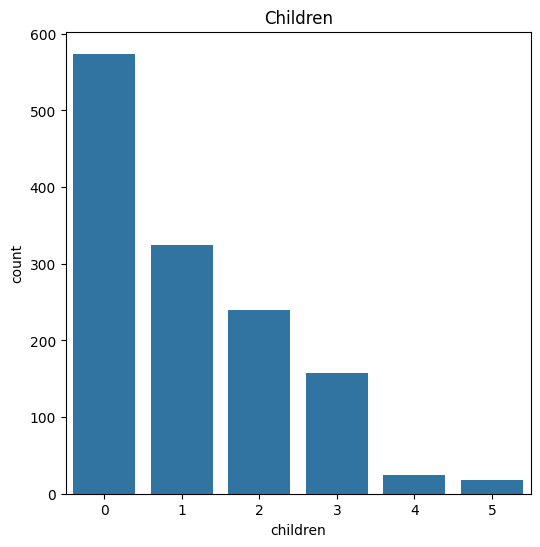

In [ ]:
# children column
mt.figure(figsize=(6,6))
sns.countplot(x='children', data=IN)
mt.title('Children')
mt.show()

In [ ]:
#Counting childrens
IN['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

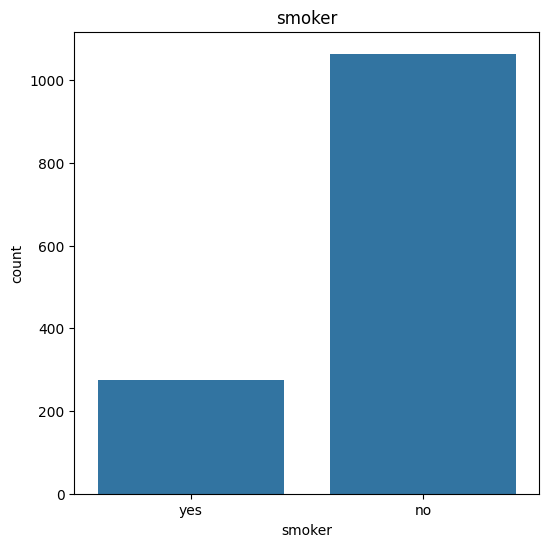

In [ ]:
# smoker column
mt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=IN)
mt.title('smoker')
mt.show()

In [ ]:
#counting Total number of the smokers
IN['smoker'].value_counts()#'yes' Means number of smokers who Smoke and 'NO' means Non Smokers


smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
#Importing train_test_split from sklearn model selections
from sklearn.model_selection import train_test_split
X = IN.drop(columns='charges', axis=1)
Y = IN['charges']

In [ ]:
#Linear Model Training Using LinearRegression model
from sklearn.linear_model import LinearRegression

In [ ]:
#Converting any float values into the numeric using pandas
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

In [ ]:
#converting string into numbers to avoid the Error
X.fillna(0, inplace=True)#replace null values into 0
Y.fillna(0, inplace=True)#replace null values into 0
regressor = LinearRegression()#Assinging linear regression to regressor

In [ ]:
#Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [ ]:
#Printing the train and test data
print(X.shape, X_train.shape, X_test.shape)

(1338, 5) (936, 5) (402, 5)


In [ ]:
reg=regressor.fit(X_train,Y_train)

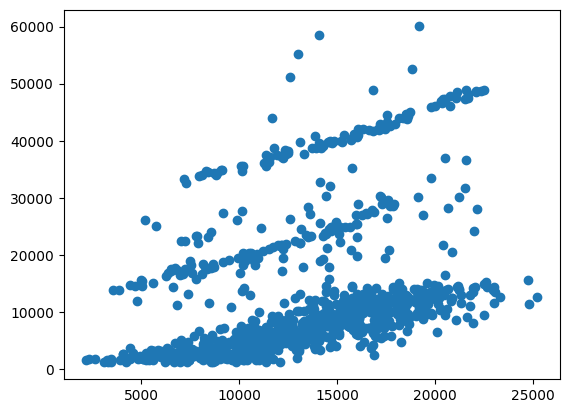

In [ ]:
mt.scatter(regressor.predict(X_train),Y_train)

In [ ]:
reg.score(X_test,Y_test)

0.05469280954079958

In [ ]:
reg.score(X_train,Y_train)

0.14474930391794472

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

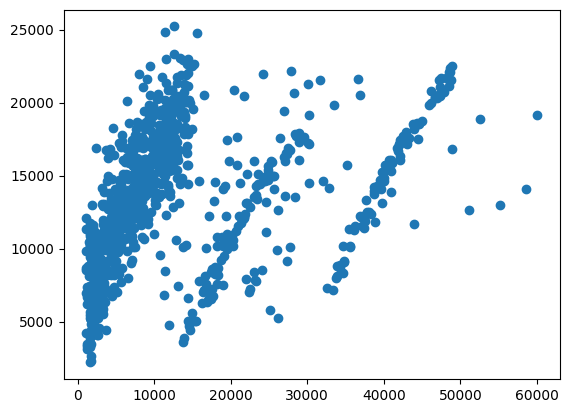

In [ ]:
#scttering the graph for relationship between data
mt.scatter(Y_train,training_data_prediction)

In [ ]:
# from sklearn.metrics import mean_squared_error
# ERROR = mean_squared_error(Y_test, test_data_prediction)
# rmse = np.sqrt(ERROR)
# print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 11620.952217441554


In [ ]:
# Example prediction
# example_patient = pd.DataFrame({
#     'age': [35],
#     'sex': [0],  # Assuming Male
#     'bmi': [25.5],
#     'children':[0],
#     'smoker':[1],
#     'charges':[1500]})
# charge = regressor.predict(example_patient)
# print("Predicted healthcare cost for the example patient:", charge)

In [ ]:
# print(regressor.intercept_)
# print(regressor.coef_)

-9667.24393442673
[2.57423053e+02 2.84217094e-13 3.98714048e+02 5.71516781e+02
 0.00000000e+00]
